Import calls

In [1]:
import sys
sys.path.append('../')

from src.load_jules_output_file import load_jules_output_file_xarray
from src.data_conversions.to_daily_value import to_daily_total, get_daily_values_at_time
from src.plotting.plot_daily import plot_daily
from src.plotting.plot_col_at_daily_time import plot_col_at_daily_time

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, date


# Load JULES netcdf file

File details.

In [2]:
folder = "~/Desktop/JULES/data/data_runs/stomatal_optimisation_runs/testing/"
file_name = "FI_Lom-fsmc_comp.H.nc"
file_name_2 = "24_03_13_16_49_FI_Lom-JULES_vn7.4-presc0.H.nc"

file_address = folder + file_name
file_address_2 = folder + file_name_2

Load and print the file

In [3]:
data = load_jules_output_file_xarray(file_address)

print(data)

<xarray.Dataset>
Dimensions:                (time: 26256, nt: 2, y: 1, x: 1, pft: 9, soil: 4)
Coordinates:
  * time                   (time) datetime64[ns] 2007-01-01T01:00:00 ... 2009...
    latitude               (y, x) float32 ...
    longitude              (y, x) float32 ...
Dimensions without coordinates: nt, y, x, pft, soil
Data variables: (12/26)
    time_bounds            (time, nt) datetime64[ns] ...
    gpp_gb                 (time, y, x) float32 ...
    resp_p_gb              (time, y, x) float32 ...
    resp_s_gb              (time, y, x) float32 ...
    ftl_gb                 (time, y, x) float32 ...
    latent_heat            (time, y, x) float32 ...
    ...                     ...
    soil_root_k            (time, soil, y, x) float32 ...
    psi_root_zone_pft      (time, pft, y, x) float32 ...
    et_stom_gb             (time, y, x) float32 ...
    psi_leaf_pft           (time, pft, y, x) float32 ...
    som_transpiration_pft  (time, pft, y, x) float32 ...
    cica_ratio

load the second file

In [4]:
data_2 = load_jules_output_file_xarray(file_address_2)

# Plot the total per day values of some variable 

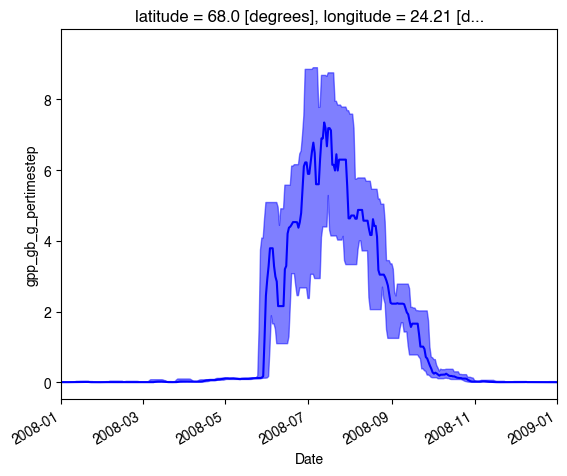

In [5]:
# Convert gpp_gb from kgC m-2 s-1 to gC m-2 h-1
data['gpp_gb_g_pertimestep'] = data['gpp_gb'] * 1000 * 60*60

plot_daily(data, 'gpp_gb_g_pertimestep', smoothing = 10, x_range = [date(2008,1,1),date(2009,1,1)])

Lets plot the daily gpp for two different files so we can compare them.

Text(0, 0.5, 'total gross primary product (g day$^{-1})$')

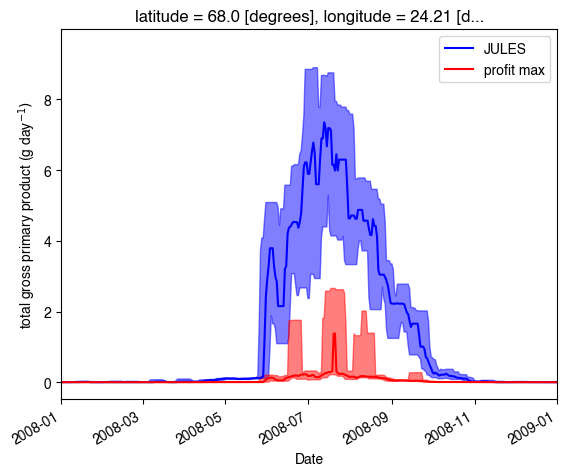

In [6]:
# Convert gpp_gb from kgC m-2 s-1 to gC m-2 h-1
data_2['gpp_gb_g_pertimestep'] = data_2['gpp_gb'] * 1000 * 60*60

plot_daily(data, 'gpp_gb_g_pertimestep', smoothing = 10, x_range = [date(2008,1,1),date(2009,1,1)], label = 'JULES')
plot_daily(data_2, 'gpp_gb_g_pertimestep', smoothing = 10, x_range = [date(2008,1,1),date(2009,1,1)], c = 'red', label = 'profit max')

plt.legend()
plt.ylabel("total gross primary product (g day$^{-1})$")

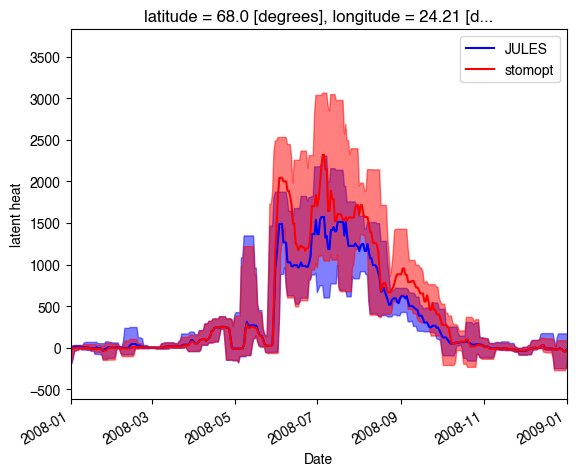

In [7]:
plot_daily(data, 'latent_heat', smoothing = 10, x_range = [date(2008,1,1),date(2009,1,1)], label = 'JULES')
plot_daily(data_2, 'latent_heat', smoothing = 10, x_range = [date(2008,1,1),date(2009,1,1)], label = 'stomopt', c = 'red')

plt.ylabel('latent heat (w m-2)')
plt.legend()

# Plot the ratio of the intercellular to atmospheric CO2 concentration at midday.

Lets plot the $c_i$ to $c_a$ ratio at midday, since this is roughly when the tree should be most water stressed.

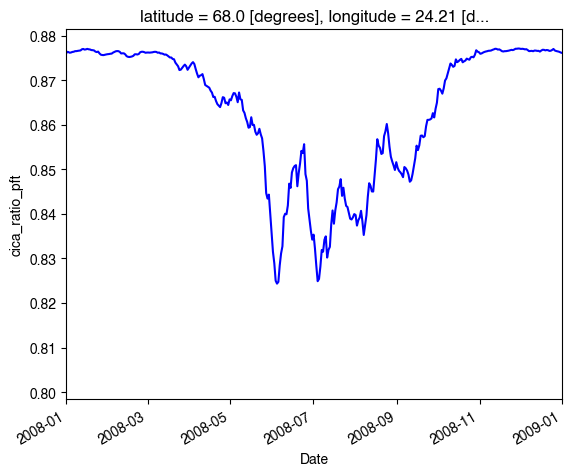

In [8]:
plot_col_at_daily_time(data.isel(pft=0), 'cica_ratio_pft', time='12:00:00', x_range = [date(2008,1,1),date(2009,1,1)], smoothing = 10)

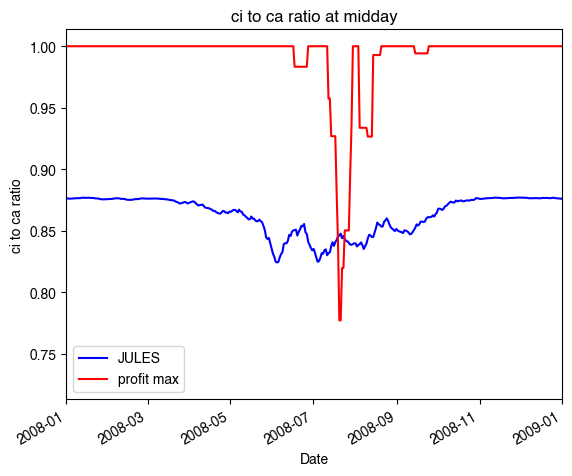

In [9]:
plot_col_at_daily_time(data.isel(pft=0), 'cica_ratio_pft', time='12:00:00', x_range = [date(2008,1,1),date(2009,1,1)], smoothing = 10, label = 'JULES')
plot_col_at_daily_time(data_2.isel(pft=0), 'cica_ratio_pft', time='12:00:00', x_range = [date(2008,1,1),date(2009,1,1)], smoothing = 10, c = 'red', label = 'profit max')

plt.title("ci to ca ratio at midday")
plt.ylabel("ci to ca ratio")
plt.legend()